In [62]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

arena_local_planner_drl_folder_path = '/home/michael/catkin_ws/src/arena-rosnav/arena_navigation/arena_local_planner/learning_based/arena_local_planner_drl'

# Evaluation of MPC DRL training run

In [19]:
data = np.load(os.path.join(arena_local_planner_drl_folder_path, 'training_logs/train_eval_log/pretrained_ppo_mpc/evaluations.npz'))
avg_success = np.sum(data['successes'], axis = 1) / 40
avg_success

array([0.5  , 0.575, 0.35 , 0.55 , 0.425, 0.3  , 0.45 , 0.4  , 0.375,
       0.4  , 0.15 , 0.2  , 0.25 , 0.175, 0.25 , 0.375, 0.2  , 0.2  ,
       0.35 , 0.1  , 0.2  , 0.3  , 0.375, 0.35 , 0.3  , 0.225, 0.2  ,
       0.225, 0.225, 0.225, 0.3  , 0.375, 0.125, 0.2  , 0.35 , 0.15 ,
       0.225, 0.15 , 0.15 , 0.05 , 0.225, 0.15 , 0.125, 0.025, 0.175,
       0.05 , 0.075, 0.025, 0.   , 0.05 , 0.025, 0.15 , 0.025, 0.05 ,
       0.025, 0.   , 0.025, 0.025, 0.025, 0.025, 0.   , 0.05 , 0.025,
       0.   , 0.025, 0.025])

In [27]:
avg_success_df = pd.DataFrame(avg_success, columns=['avg_success'])
avg_success_df

,avg_success
0,0.500
1,0.575
2,0.350
3,0.550
4,0.425
...,...
61,0.050
62,0.025
63,0.000
64,0.025


In [53]:
sns.set_theme(context='paper')

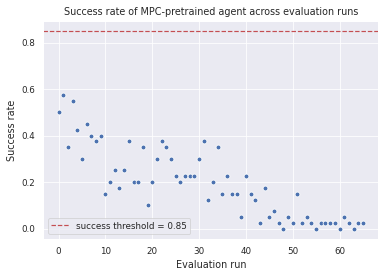

In [68]:
sns.lineplot(x=avg_success_df.index, y='avg_success', data=avg_success_df, marker='o', linestyle='').set(title='Success rate of MPC-pretrained agent across evaluation runs', xlabel='Evaluation run', ylabel='Success rate')
ax = plt.gca()
ax.axhline(y=0.85, color='r', ls='--', label='success threshold = 0.85')
plt.legend()

# Evaluation of human expert DRL training run

## success rate vs eval run (from evaluations.npz)

## proportion of collisions vs eval run (from monitor.csv)
### monitor.csv: each entry is one episode, there are 40*num_evals entries. Can use it to compute average collision and timeout rates per episode.

monitor = pd.read_csv('monitor.csv', header=0, names=['r', 'l', 't', 'done_reason', 'is_success'])

monitor[monitor['done_reason'] == '2']  # goal was reached

monitor[monitor['done_reason'] == '0']  # maximum number of steps reached

monitor[monitor['done_reason'] == '1']  # collision occured



## proportion of timeouts vs eval runs (from monitor.csv)

# Evaluation of agent trained from scratch with DRL

## success rate vs eval run (from evaluations.npz)

## proportion of collisions vs eval run (from monitor.csv)

## proportion of timeouts vs eval runs (from monitor.csv)